In [33]:
import numpy as np
from math import acos,sqrt
from matplotlib import pyplot as plt
from matplotlib import patches

In [34]:
%matplotlib inline

### Group 5 

* Zhong Chen

* Yeting Dong

* Yunis Fanger

* Alexander Jesipow

* Yinan Shi

# Assignment 1:
## Task1:

In [35]:
p = 2
q = 0.25
d = determine_hypercube_length_from_prob(p, q)
print(d)

p_list = [2, 3, 500]
evaluated_probs = [determine_prob_of_gaussian_distributed_rv(p) for p in p_list]
print(evaluated_probs)

0.5
[0.01990000000000003, 0.029700999999999977, 0.9934295169575854]


In [36]:
def determine_hypercube_length_from_prob(p, q):
    """Calculate the length (d) of hypercube in dependence on
    its dimensionality (p) and the probability of the event of
    being within it, assuming a uniform distribution over a
    hypercube of lenth one"""
    #Volume of C_1=1 and equates to P(X el C_1) = 1
    #With uniform distribution -> P(X el C_d) = volume of C_d
    #Volume of C_d = d**p = P(X el C_d)=q
    d = q ** (1 / p)
    return d


def determine_prob_of_gaussian_distributed_rv(p):
    """Calculate the probability of a p dimensional gaussian distributed
    random variable not lying within a hypercube of length 5.152 of the
    same dimensionality"""
    #Given: P(X^1 el C_5.152)=0.99 -> since the RV is iid in all dimensions:
    #P(X^p el C_5152)= 0.99**p
    q = 1 - 0.99 ** p
    return q

* The length $d$ of a $p$ dimensional hypercube corresponding to the probability $q$ is $d = q^{\frac{1}{p}}$ 

* Our results for $p = [2, 3, 500]$ are $[0.0199, 0.0297, 0.9934]$ respectively

## Task2:

In [37]:
def sample_from_hypercube(n, p=2, domain=(-1, 1)):
    """Sample n uniformly distributed random variables within a p dimensional
    hypercube bounded by the domain given"""
    samples = np.random.uniform(domain[0], domain[1], [n, p])
    return samples


def compute_angle(v1, v2):
    """Compute the angle between two vectors"""
    if np.array_equal(v1, v2):
        return 0
    angle = acos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    return angle


def compute_average_min_angle(samples):
    """Computes the average of min angles """
    #Get the minimum angles pairwise for each sample to every other one
    #min_angles = [min([compute_angle(sample, other_sample) for other_sample in samples-sample]) for
    #              sample in samples]
    min_angles = np.ones(samples.shape[0]) * -1
    for i_sample, sample in enumerate(samples):
        for i_other_sample, other_sample in enumerate(samples[i_sample+1:, :]):
            angle = compute_angle(sample, other_sample)
            if min_angles[i_sample] == -1 or angle < min_angles[i_sample]:
                min_angles[i_sample] = angle
            if min_angles[i_sample + i_other_sample] == -1 or angle < min_angles[i_sample + i_other_sample]:
                min_angles[i_sample + i_other_sample] = angle
    avg_min_angles = np.average(min_angles)
    return avg_min_angles

0.0200210482211


Text(0.5,0,'Dimension')

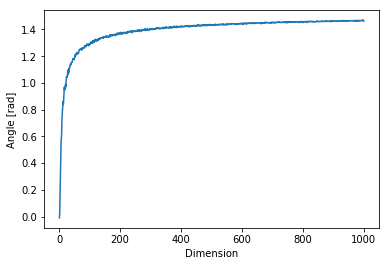

In [38]:
n = 100

p = 2
uniform_samples = sample_from_hypercube(n, p)
average_min_angle = compute_average_min_angle(uniform_samples)
print(average_min_angle)

dimension_values = range(1, 1001)
average_min_angles_for_dimension = [compute_average_min_angle(sample_from_hypercube(n, p)) for p in dimension_values]
plt.plot(dimension_values,average_min_angles_for_dimension)
plt.ylabel('Angle [rad]')
plt.xlabel('Dimension')

* As the dimension increases, the angles between any two vectors approach 90°. That means all vectors are approximately perpendicular to each other.

* When increasing the sample size, for large dimensions there will be no differences. For fewer dimensions the minimum angle between two vectors increases less quickly.

## Task 3:

In [43]:
def compute_radius_of_hypersphere(p):
    """
         
    """
    radius = sqrt(.5**2 * p) - 0.5
    
    return radius

0.20710678118654757


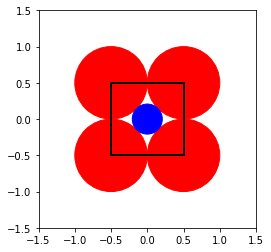

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

radius = 0.5
mid_radius = compute_radius_of_hypersphere(2)
centers = zip((-0.5, 0.5, -0.5, 0.5), (-0.5, -0.5, 0.5, 0.5))
circles = [plt.Circle(center, radius=radius, color='r') for center in centers]
for circle in circles:
    ax.add_artist(circle)

unit_rectangle = plt.Rectangle(
    (-0.5, -0.5),  # (x,y)
    1,  # width
    1,  # height
    fill=False,
    zorder=1,
    color='k',
    linewidth=2
)
ax.add_artist(unit_rectangle)

middle_circle=plt.Circle((0,0), color='b', radius=mid_radius)
ax.add_artist(middle_circle)

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

print(mid_radius)

The radius of the circle in the origin is $0.2071$

We take the distance between the origin and one corner of the $p$ dimensional hypercube $\sqrt{0.5^2  p}$ and subtract the radius of a the hypercube (always $0.5$). The remaining value is the radius of the hypersphere in the origin.

Text(0,0.5,'Radius')

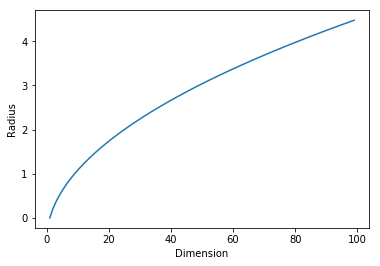

In [52]:
dimension_values = range(1, 100)
evaluated_radii = [compute_radius_of_hypersphere(p) for p in dimension_values]
plt.plot(dimension_values, evaluated_radii)
plt.xlabel('Dimension')
plt.ylabel('Radius')

For 4 dimensions, the radius of the hypersphere in the origin is $\frac{1}{2}$ and is therefore the same size as the outer hyperspheres.

For 9 dimensions, the radius exceeds $1$, which is very counter intuitive when thinking of two dimensions.

As we continue increasing the dimensions, the radius tends towards infinity as well.

## Task 4:

In [55]:
xy_values = np.array([[(i, j) for j in range(1, 4)] for i in range(2, 0,-1)])
prob_table = np.array([[0.4, 0.14, 0.05], [0.02, 0.26, 0.13]])

In [60]:
print(prob_table)
#print(xy_values)
print(prob_table.sum().sum())

Ey_xeq2 = np.dot(prob_table[0, :], [1,2,3]) / prob_table[0,:].sum()
print(Ey_xeq2)

Pxeq1yeq3 = prob_table[1,2]
Pyeq3 = prob_table[:,2].sum()
Pxeq1_yeq3 = Pxeq1yeq3/Pyeq3
print(Pxeq1_yeq3)

[[ 0.4   0.14  0.05]
 [ 0.02  0.26  0.13]]
1.0
1.40677966102
0.722222222222


* The sum of all table entries equals $1$ and each individual entry is between $0$ and $1$, therefore it is a probability table.

* The conditional expectation $\mathop{E}_{Y | X=2} [Y] = 1.406$ and $Pr(X=1 | Y =3) = 0.722$

* No, because $\iint_{-\infty}^{\infty} p(x, y)  \mathrm{d}x  \mathrm{d}y \neq 1$

* $p(x) = \int_x^{\infty} 2 e^{-(x+y)} \mathrm{d}y = 2 e ^{-2x}$

* $p(y) = \int_0^{y} 2 e^{-(x+y)}  \mathrm{d}x= 2 (e ^{-y} - e^{-2y})$

* $Pr(X \leq 2 | Y = \frac{1}{2}) = \int_0^2 \frac{1}{15} (2x + 2) \mathrm{d}x = \frac{8}{15}$